# **Problem Statement**
Predict the price of the Uber ride from a given pickup point to
the agreed drop-off location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression
models.
5. Evaluate the models and compare their respective
scores like R2, RMSE, etc. Dataset link:
https://www.kaggle.com/datasets/yasserh/uber-fares-
dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("uber.csv")

In [ ]:
df.shape

(200000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

# 1. Preprocess the dataset

In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Fill Missing Values

In [ ]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)

In [ ]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].median(),inplace=True)

Drop Unwanted Columns

In [ ]:
df.drop(['Unnamed: 0', 'key'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Convert datatype of column 'pickup_datetime' from object to DateTime

In [ ]:
df['day']=pd.to_datetime(df['pickup_datetime']).dt.day
df['month']=pd.to_datetime(df['pickup_datetime']).dt.month
df['year']=pd.to_datetime(df['pickup_datetime']).dt.year
df['hour']=pd.to_datetime(df['pickup_datetime']).dt.hour
df['dayofweek']=pd.to_datetime(df['pickup_datetime']).dt.dayofweek

In [ ]:
df = df.drop(columns=['pickup_datetime'])

In [ ]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
day                    int64
month                  int64
year                   int64
hour                   int64
dayofweek              int64
dtype: object

In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hour,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,5,2015,19,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,7,2009,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,8,2009,21,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,6,2009,8,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,8,2014,17,3


In [ ]:
df.shape

(200000, 11)

# 2. Identify outliers

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
day                     AxesSubplot(0.125,0.456463;0.352273x0.0920732)
month                AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
year                    AxesSubplot(0.125,0.345976;0.352273x0.0920732)
hour                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

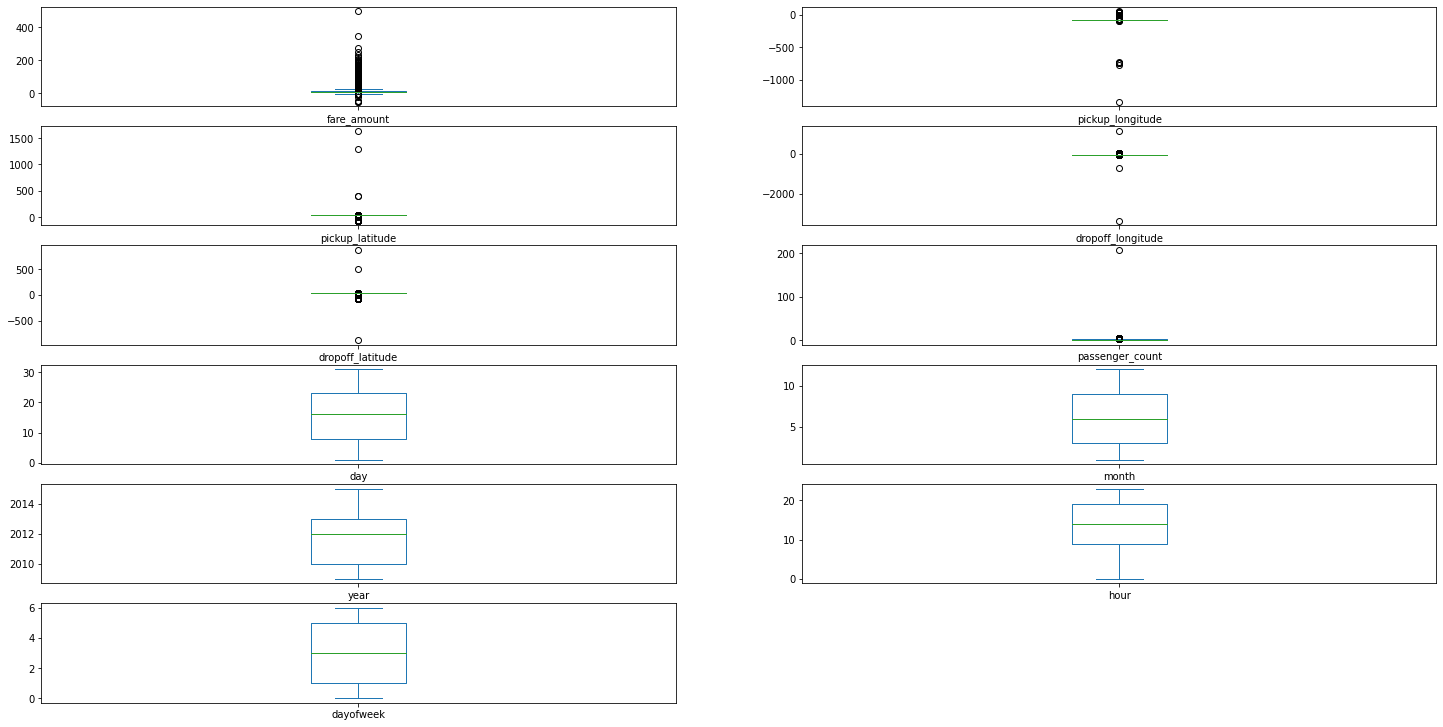

In [ ]:
# Boxplot
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(25,15))


In [ ]:
def remove_outlier(df , col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df[col] , lower_whisker , upper_whisker)
    return df

def treat_outliers_all(df , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df

In [ ]:
df = treat_outliers_all(df , df.iloc[: , 0::])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
day                     AxesSubplot(0.125,0.456463;0.352273x0.0920732)
month                AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
year                    AxesSubplot(0.125,0.345976;0.352273x0.0920732)
hour                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

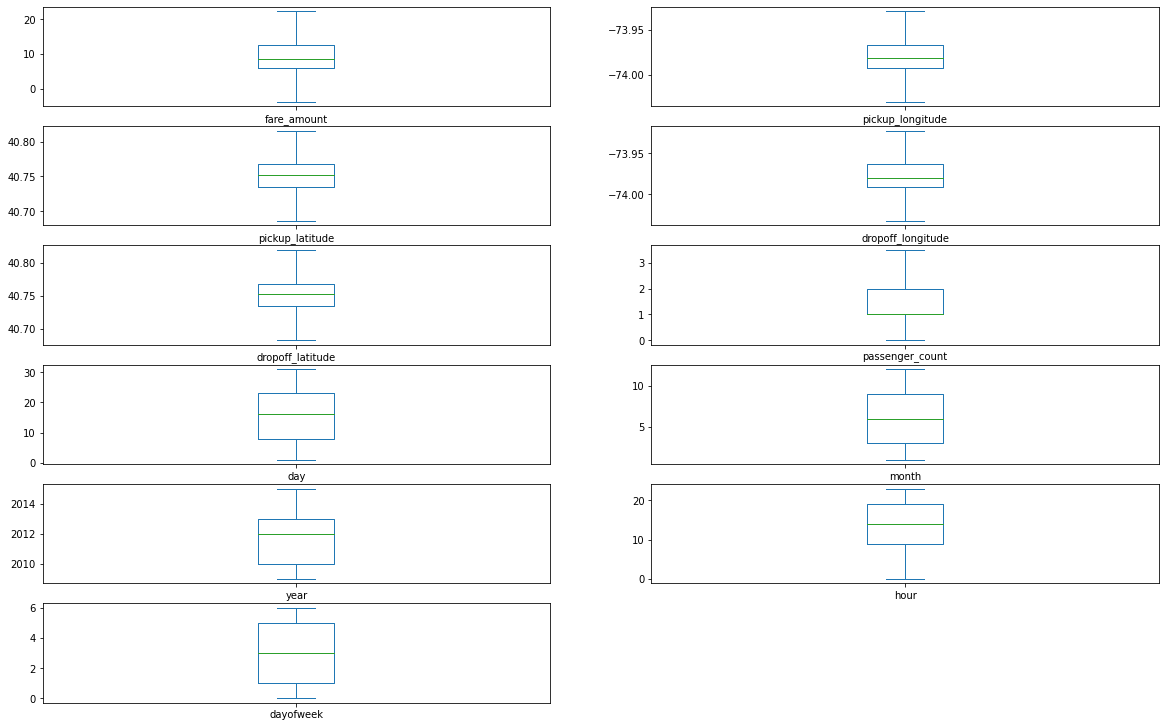

In [ ]:
# Boxplot
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(20,15))

# 3. Check the Correlation

Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.

In [ ]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrMatrix = df.corr()

# print the correlation matrix
corrMatrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hour,dayofweek
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125871,0.015778,0.004534,0.030817,0.141277,-0.023623,0.013652
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073311,-0.013213,-0.003204,0.001169,0.010198,0.011579,-0.024652
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515735,-0.012889,-0.001553,0.001562,-0.014243,0.029681,-0.042310
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245665,-0.009325,-0.004027,0.002394,0.011355,-0.046578,-0.003349
dropoff_latitude,-0.125871,0.073311,0.515735,0.245665,1.000000,-0.006329,-0.003499,-0.001190,-0.009595,0.019764,-0.031932
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006329,1.000000,0.002712,0.010351,-0.009749,0.020274,0.048550
day,0.004534,-0.003204,-0.001553,-0.004027,-0.003499,0.002712,1.000000,-0.017360,-0.012170,0.004677,0.005617
month,0.030817,0.001169,0.001562,0.002394,-0.001190,0.010351,-0.017360,1.000000,-0.115859,-0.003926,-0.008786
year,0.141277,0.010198,-0.014243,0.011355,-0.009595,-0.009749,-0.012170,-0.115859,1.000000,0.002156,0.006113
hour,-0.023623,0.011579,0.029681,-0.046578,0.019764,0.020274,0.004677,-0.003926,0.002156,1.000000,-0.086947


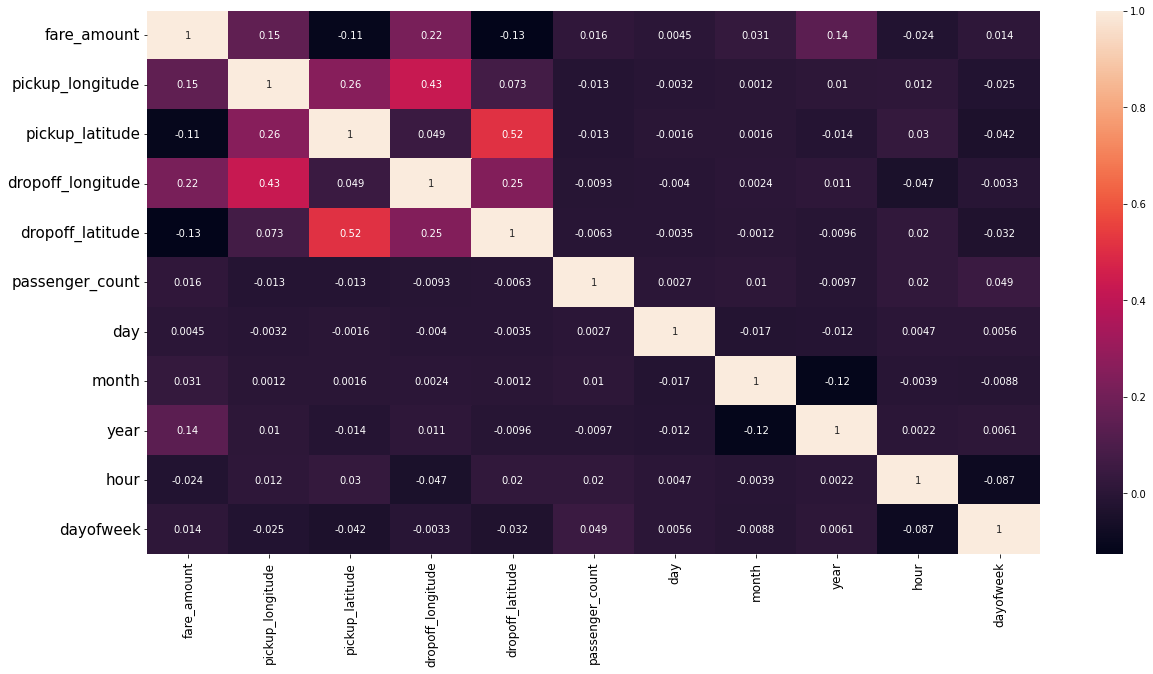

In [ ]:
# Plot the heatmap for the correlation matrix
plt.figure(figsize = (20,10))

# set the size of x and y axes labels using 'fontsize'
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

sns.heatmap(corrMatrix, annot=True)

# display the plot
plt.show()

# 4. Implement linear regression and random forest regression models.

1. Split the data into features and target dataframes

In [ ]:
# select only the target variable 'amount' and store it in dataframe 'y'
y = pd.DataFrame(df['fare_amount'])

In [ ]:
# use 'drop()' to remove the variable 'amount' from df
# 'axis = 1' drops the corresponding column(s)
x = df.drop('fare_amount',axis = 1)

In [ ]:
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hour,dayofweek
0,-73.999817,40.738354,-73.999512,40.723217,1.0,7,5,2015,19,3
1,-73.994355,40.728225,-73.994710,40.750325,1.0,17,7,2009,20,4
2,-74.005043,40.740770,-73.962565,40.772647,1.0,24,8,2009,21,0
3,-73.976124,40.790844,-73.965316,40.803349,3.0,26,6,2009,8,4
4,-73.929786,40.744085,-73.973082,40.761247,3.5,28,8,2014,17,3


2. Split the data into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# print dimension of predictors train set
print("The shape of X_train is:",x_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",x_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (160000, 10)
The shape of X_test is: (40000, 10)
The shape of y_train is: (160000, 1)
The shape of y_test is: (40000, 1)


# Linear Regression Model

In [ ]:
#Training the simple linear regression model on the training set
from sklearn.linear_model import LinearRegression
lregr = LinearRegression()
lregr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Actual vs Predicted Values
y_pred = lregr.predict(x_test)
df = {'Actual': y_test, 'Predicted': y_pred}
df

{'Actual':         fare_amount
 49673           4.0
 171551          6.1
 5506            8.5
 38370           4.9
 36930           6.5
 ...             ...
 63840          10.7
 128107          2.5
 108940         10.0
 199933         11.3
 22902          12.5
 
 [40000 rows x 1 columns], 'Predicted': array([[10.76419831],
        [ 8.17555332],
        [10.6997011 ],
        ...,
        [10.68164662],
        [ 9.70203427],
        [ 9.28752553]])}

In [ ]:
# Calculate RMSE, MAE, MSE
from sklearn import metrics
r_squared_LR = lregr.score(x_train, y_train)
lr_MAE= metrics.mean_absolute_error(y_test, y_pred)
lr_MSE= metrics.mean_squared_error(y_test, y_pred)
lr_RMSE= np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#intantiate the regressor
rf_reg = RandomForestRegressor()

# fit the regressor with training dataset
rf_reg.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [ ]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(x_test)
y_pred_RF

array([ 6.105 ,  5.6565,  9.465 , ..., 10.31  , 12.057 , 12.439 ])

In [ ]:
# Calculate RMSE, MAE, MSE
from sklearn import metrics
r_squared_RF = rf_reg.score(x_test,y_test)
r_squared_RF
rf_MAE= metrics.mean_absolute_error(y_test, y_pred_RF)
rf_MSE= metrics.mean_squared_error(y_test, y_pred_RF)
rf_RMSE= np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))

# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [ ]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value

# create a list of column names
cols = ['Model', 'MAE', 'MSE', 'RMSE', 'R-Squared']

# create a empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
reg_full_metrics = pd.Series({'Model': "Linear Regression ",
                     'MAE': lr_MAE,
                     'MSE': lr_MSE,
                     'RMSE':lr_RMSE,
                     'R-Squared': r_squared_LR})

# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(reg_full_metrics, ignore_index = True)

# compile the required information
reg_full_metrics = pd.Series({'Model': "Random Forest Regression ",
                     'MAE': rf_MAE,
                     'MSE': rf_MSE,
                     'RMSE':rf_RMSE,
                     'R-Squared': r_squared_RF})

result_tabulation = result_tabulation.append(reg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,MAE,MSE,RMSE,R-Squared
0,Linear Regression,4.067143,26.375806,5.135738,0.108989
1,Random Forest Regression,1.549128,6.008704,2.451266,0.797753
